# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=" + unit + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tralee
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | ormara
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | cabo san lucas
Processing Record 8 of Set 1 | santa ana maya
Processing Record 9 of Set 1 | chonchi
Processing Record 10 of Set 1 | tezu
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | queenstown
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | quellon
Processing Record 17 of Set 1 | kayangel
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | olonkinbyen
Processing 

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [36]:
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [37]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tralee,52.2704,-9.7026,13.65,93,98,2.77,IE,1692931791
1,bilibino,68.0546,166.4372,12.66,41,87,0.96,RU,1692931792
2,ormara,25.2088,64.6357,26.45,86,100,6.38,PK,1692931793
3,vorgashor,67.5833,63.9500,6.56,97,100,6.15,RU,1692931794
4,tiksi,71.6872,128.8694,12.10,50,100,7.48,RU,1692931797
5,cabo san lucas,22.8909,-109.9124,31.61,66,0,2.06,MX,1692931557
6,santa ana maya,20.0000,-101.0167,17.49,70,69,1.51,MX,1692931799
7,chonchi,-42.6128,-73.8092,3.40,94,42,1.04,CL,1692931800
8,tezu,27.9167,96.1667,23.92,98,100,0.64,IN,1692931801
9,waitangi,-43.9535,-176.5597,9.90,87,99,3.58,NZ,1692931803


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [41]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,13.65,93,98,2.77,IE,1692931791
1,bilibino,68.0546,166.4372,12.66,41,87,0.96,RU,1692931792
2,ormara,25.2088,64.6357,26.45,86,100,6.38,PK,1692931793
3,vorgashor,67.5833,63.9500,6.56,97,100,6.15,RU,1692931794
4,tiksi,71.6872,128.8694,12.10,50,100,7.48,RU,1692931797


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

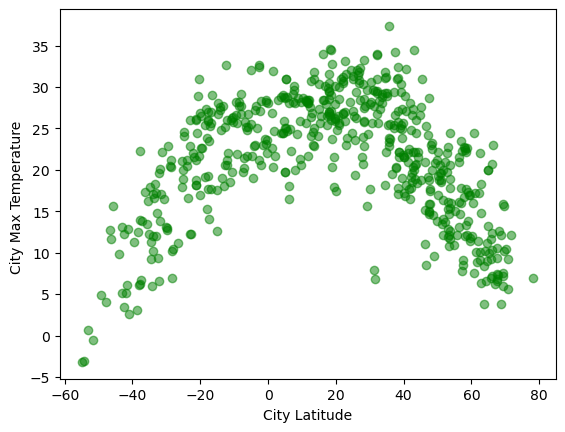

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Max Temperature ')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

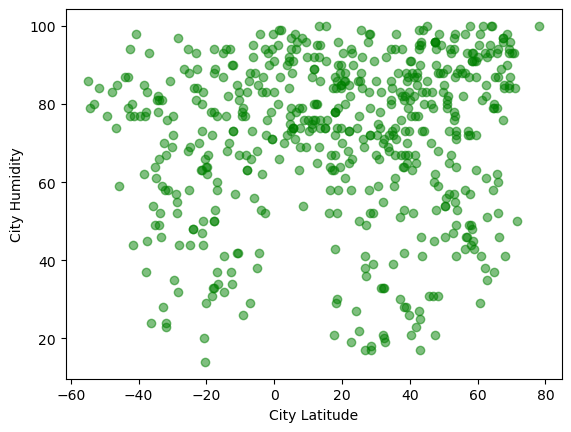

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

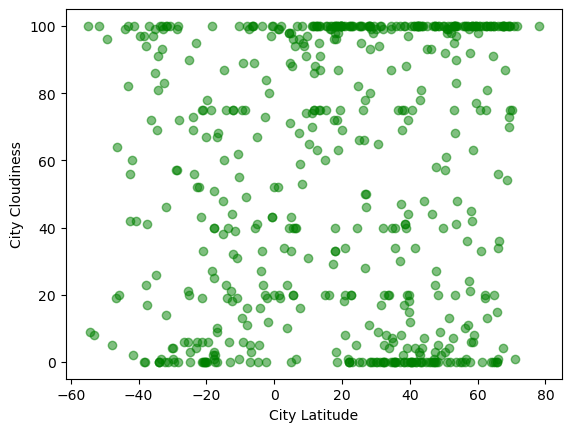

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

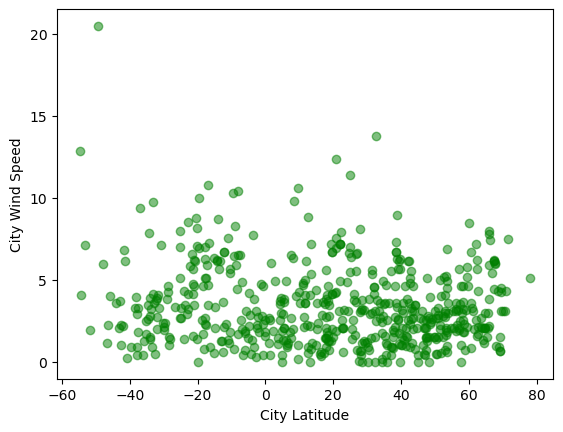

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [132]:
# # Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='g',alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.xlabel('Latitude')
    plt.ylabel(y_title)


In [133]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tralee,52.2704,-9.7026,13.65,93,98,2.77,IE,1692931791
1,bilibino,68.0546,166.4372,12.66,41,87,0.96,RU,1692931792
2,ormara,25.2088,64.6357,26.45,86,100,6.38,PK,1692931793
3,vorgashor,67.5833,63.9500,6.56,97,100,6.15,RU,1692931794
4,tiksi,71.6872,128.8694,12.10,50,100,7.48,RU,1692931797


In [134]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,chonchi,-42.6128,-73.8092,3.40,94,42,1.04,CL,1692931800
9,waitangi,-43.9535,-176.5597,9.90,87,99,3.58,NZ,1692931803
10,queenstown,-31.8976,26.8753,13.79,24,100,3.87,ZA,1692931804
11,puerto natales,-51.7236,-72.4875,-0.56,84,100,1.94,CL,1692931577
12,fale old settlement,-9.3852,-171.2468,28.20,77,13,6.44,TK,1692931807


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7061380014408357


Text(0, 0.5, 'Max Temp')

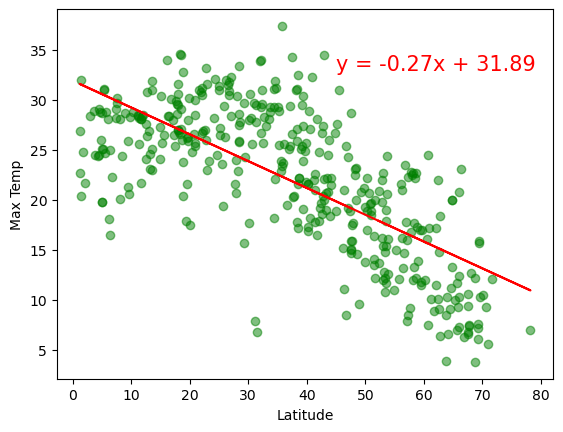

In [168]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (45,33))
plt.ylabel('Max Temp')

The r-value is: 0.7979506112783411


Text(0, 0.5, 'Max Temp')

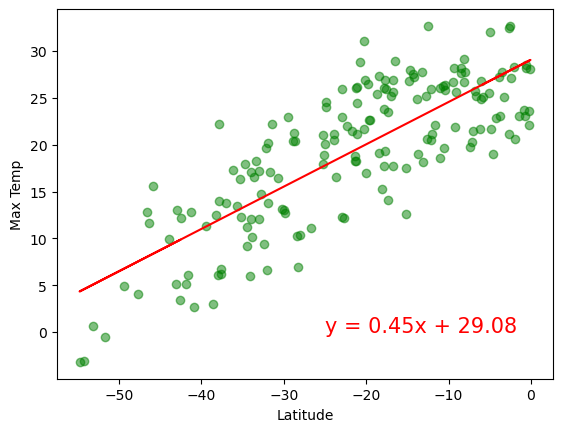

In [164]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,0))
plt.ylabel('Max Temp')

**Discussion about the linear relationship:** 

The r-value is -0.7061 for the Northern Hemisphere variables (Latitude and Max Temp), indicating a strong negative relationship. 

The r-value is 0.7979, for the Southern Hemisphere variables (Latitude and Max Temp), indicating a very strong positive relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.015448644690265502


Text(0, 0.5, 'Humidity')

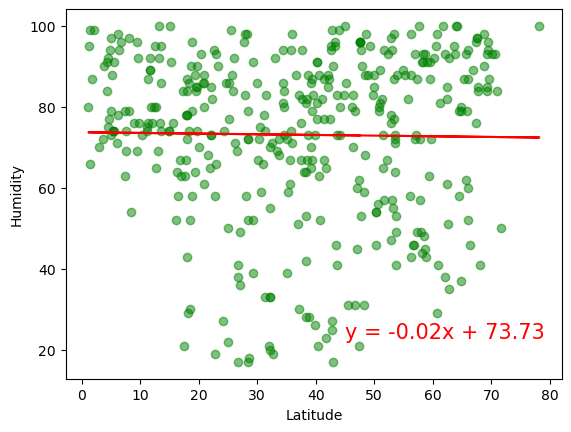

In [162]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Max Temp', (45,23))
plt.ylabel('Humidity')

The r-value is: 0.04029171987103087


Text(0, 0.5, 'Humidity')

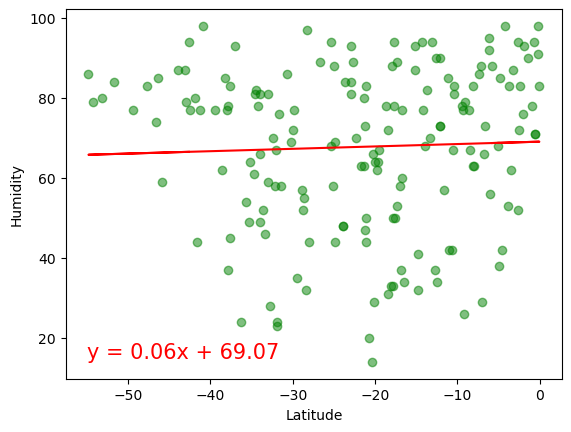

In [159]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 15))
plt.ylabel('Humidity')

**Discussion about the linear relationship:** 

The r-value is -0.0154 for the Northern Hemisphere variables (Latitude and Humidity), indicating a very weak negative relationship. 

The r-value is 0.0402, for the Southern Hemisphere variables (Latitude and Humidity), indicating a very weak positive relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.04422193613738084


Text(0, 0.5, 'Cloudiness')

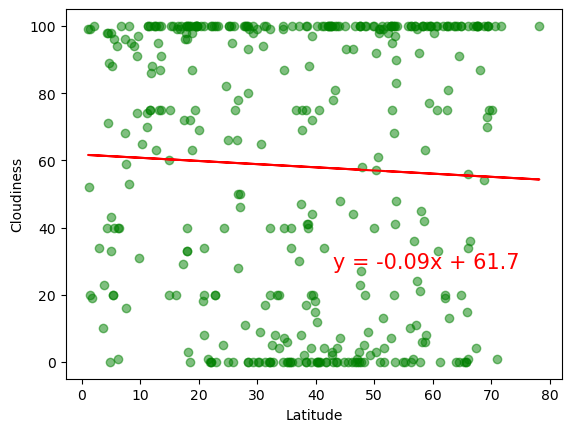

In [158]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Max Temp', (43, 28))
plt.ylabel('Cloudiness')

The r-value is: -0.08950489061774199


Text(0, 0.5, 'Cloudiness')

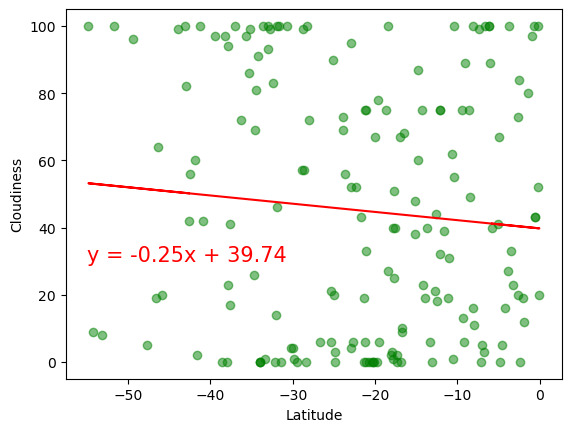

In [156]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,30))
plt.ylabel('Cloudiness')

**Discussion about the linear relationship:** 

The r-value is -0.0442 for the Northern Hemisphere variables (Latitude and Cloudiness), indicating a very weak negative relationship. 

The r-value is -0.0895, for the Southern Hemisphere variables (Latitude and Cloudiness), indicating a very weak negative relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00775812172428693


Text(0, 0.5, 'Wind Speed')

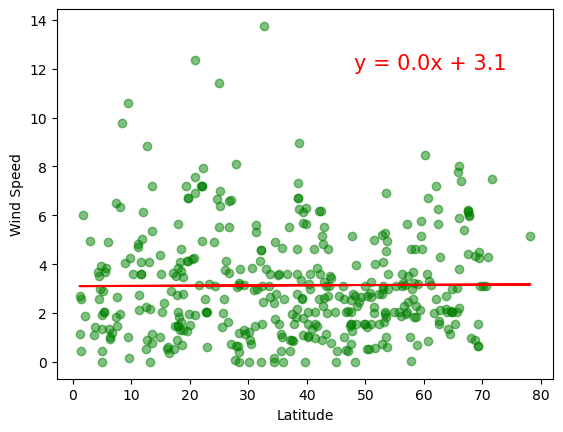

In [155]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Max Temp', (48, 12))
plt.ylabel('Wind Speed')

The r-value is: -0.0921854634199794


Text(0, 0.5, 'Wind Speed')

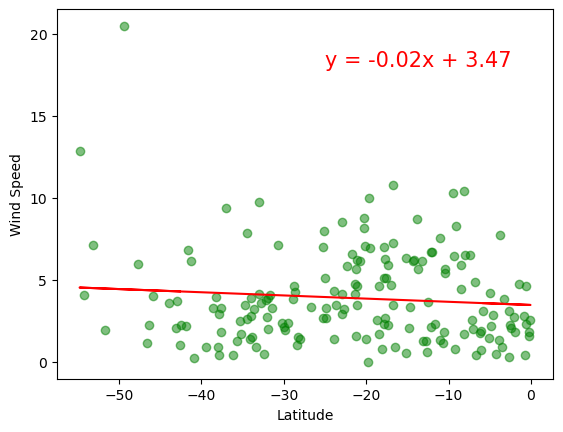

In [149]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,18))
plt.ylabel('Wind Speed')

**Discussion about the linear relationship:** 

The r-value is 0.0077 for the Northern Hemisphere variables (Latitude and Wind Speed), indicating a very weak positive correlation. 

The r-value is -0.0921 for the Southern Hemisphere variables (Latitude and Wind Speed), indicating a weak/very weak negative correlation.